## 数据探索

In [2]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


In [3]:
train_data = pd.read_csv('D:\\train.csv')
test_data = pd.read_csv('D:\\test.csv')

#sns.set_style('whitegrid')
train_data.head()

,uid,label,gender,age,tags,time,province,city,phone,model
0,1190258,1,NaN,4.0,"[10147894,12164649,5737867,12614444,10567578,1...","[1.559305645165E12,1.589771859076E12,1.5593056...",广东,汕尾,OPPO,k1
1,1119469,0,NaN,NaN,"[12545416,13096510,12941454,10882324,13056107,...","[1.602720969208E12,1.602720969208E12,1.6027209...",吉林,辽源,OPPO,r9s
2,1198468,1,NaN,4.0,"[9952871,10977296,12546375,12514349,9446069,10...","[1.583400582853E12,1.599880343178E12,1.5592561...",河北,廊坊,OPPO,r9
3,1134962,0,NaN,2.0,"[10308451,4457057,12164649,13669217,12874521,1...","[1.602050840433E12,1.559294082566E12,1.5743256...",海南,海口,OPPO,OPPO r11s
4,1202094,1,0.0,NaN,"[4457927,9334567,11219658,13647044,9460596,109...","[1.562217310326E12,1.569115329888E12,1.5622173...",贵州,贵阳,华为,麦芒5


In [7]:
train_data.info()
print("-" * 40)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 10 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   uid       200000 non-null  int64  
 1   label     200000 non-null  int64  
 2   gender    38350 non-null   float64
 3   age       174262 non-null  float64
 4   tags      200000 non-null  object 
 5   time      200000 non-null  object 
 6   province  200000 non-null  object 
 7   city      200000 non-null  object 
 8   phone     200000 non-null  object 
 9   model     200000 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 15.3+ MB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   uid       100000 non-null  int64  
 1   gender    19288 non-null   float64
 2   age       87107 non-null   floa

In [8]:
train_data.describe()

,uid,label,gender,age
count,2.000000e+05,200000.00000,38350.000000,174262.000000
mean,1.149953e+06,0.49912,0.403468,3.320867
std,8.668073e+04,0.50000,0.490599,1.466731
min,1.000002e+06,0.00000,0.000000,1.000000
25%,1.074948e+06,0.00000,0.000000,2.000000
50%,1.149758e+06,0.00000,0.000000,3.000000
75%,1.225105e+06,1.00000,1.000000,4.000000
max,1.300000e+06,1.00000,1.000000,6.000000


## 手机价格爬虫

In [ ]:
from bs4 import BeautifulSoup
from urllib.request import Request,urlopen
from urllib.parse import quote
import string
import openpyxl
import pandas as pd
import numpy as np
import csv
import re
import matplotlib.pyplot as plt
import seaborn as sns

def read_model():
    data = pd.read_csv("E:\\学校资料\\数据挖掘竞赛\\test.csv")
    phone_data = data.drop(['uid', 'gender', 'age', 'tags', 'time', 'province', 'city'], axis=1)
    phone_data['type'] = phone_data['phone']+' '+phone_data['model']
    phone_data.drop(['phone', 'model'], axis=1, inplace=True)
    phone_data = np.array(phone_data)
    model_list = phone_data.tolist()
    for i in range(0, len(model_list)):
        model_list[i] = str(model_list[i][0])
    model_list = list(set(model_list))
    return model_list


def handle_url(keyword):
    search_url_head = 'http://detail.zol.com.cn/index.php?c=SearchList&subcateId=57&kword='
    search_url = search_url_head + keyword
    search_url = quote(search_url, safe=string.printable)
    return keyword, search_url


def get_data(keyword, search_url):
    requests = Request(search_url)
    requests.add_header('Cookie',
                        'ip_ck=786D4P70j7QuODkyNzQzLjE1MzIwODM0NjM%3D; BDTUJIAID=85297d8813f1d7e701c59249e59206bc; vjuids=-1a1fc1c9b.165371e6bf7.0.6b74674fd875b; vjlast=1534228065.1534228065.30; z_pro_city=s_provice%3Dbeijing%26s_city%3Dbeijing; userProvinceId=1; userCityId=587; userCountyId=0; userLocationId=1; gr_user_id=842674bf-45c3-43b3-8dcc-6dcb05367cb8; realLocationId=1; userFidLocationId=1; lv=1542700062; vn=6; questionnaire_close_today=1542672001; questionnaire_close_total=3; Hm_lvt_ae5edc2bc4fc71370807f6187f0a2dd0=1541474806,1542682304,1542700062,1542704285; z_day=izol102454%3D5%26izol103910%3D5%26izol103920%3D2%26izol103835%3D3%26ixgo20%3D1%26rdetail%3D9; gr_session_id_9b437fe8881a7e19=e15374bb-4626-43bf-9b95-2632a32ea2e6; gr_session_id_9b437fe8881a7e19_e15374bb-4626-43bf-9b95-2632a32ea2e6=true; listSubcateId=57; visited_subcateId=57|0; visited_subcateProId=57-0,1204795,1213467|0-0; visited_serachKw=oppo%20r17%7Cr17%20oppo%7Cr17; Adshow=0; questionnaire_pv=1542672086; Hm_lpvt_ae5edc2bc4fc71370807f6187f0a2dd0=1542704847')
    response = urlopen(requests)
    html = BeautifulSoup(response, 'html.parser', from_encoding='utf-8')
    target1 = html.find('div', {'class': 'main'})
    target2 = target1.find_all('div', {'class': 'list-item clearfix'})

    info = []
    if len(target2) != 0:
        target3 = target2[0]
        target4 = target3.find('div', {'class': 'pro-intro'})
        title = target4.find('h3').get_text()
        product_info = target4.find('ul').find('li', {'class': 'cate'})

        if product_info is not None:
            product_type = product_info.find_all('a')[0].get_text()
        else:
            product_type = '未知'

        price = target3.find('div', {'class': 'price-box'}).find('b', {'class': 'price-type'}).get_text()
        # print(price)
        if price.isdigit() == False:
            if price.endswith('万'):
                price = float(re.findall(r'\d+\.?\d*', price)[0])
                price = price * 10000
            else:
                price = -1  # 后续需要清洗掉

        keyword = keyword.lstrip('[\'').rstrip('\']')
        # print(keyword)
        info.append(keyword)
        # info.append(title)
        # info.append(product_type)
        info.append(price)
        # info.append(product_info)
        print(info)
    return info

def price():
    data = pd.read_csv("E:\\学校资料\\数据挖掘竞赛\\test.csv")
    price = pd.read_csv("price_test.csv", encoding='gbk')
    price_dic = dict(zip(price['model'], price['price']))
    # print(price_dic)
    list1 = []
    list2 = []
    label = []
    error = 0
    level1 = 0
    level2 = 0
    level3 = 0
    level4 = 0
    level5 = 0
    level6 = 0
    for i in range(0, data.shape[0]):
        list1.append(str(data.iloc[i, 7]) + str(data.iloc[i, 8]).strip().replace(' ', ''))
    for i in range(0, data.shape[0]):
        count = 0
        for j in price_dic.keys():
            count+=1
            if list1[i] == j:
                list2.append(price_dic[j])
                # if int(price_dic[j])<800:
                #     error+=1
                #     level1+=1
                #     label.append('1')
                if (int(price_dic[j])<800):
                    level1+=1
                    label.append('1')
                elif (int(price_dic[j])>=800)&(int(price_dic[j])<2100):
                    level2+=1
                    label.append('2')
                elif (int(price_dic[j])>=2100)&(int(price_dic[j])<2300):
                    level3+=1
                    label.append('3')
                elif (int(price_dic[j])>=2300)&(int(price_dic[j])<2500):
                    level4+=1
                    label.append('4')
                elif (int(price_dic[j])>=2500)&(int(price_dic[j])<3000):
                    level5+=1
                    label.append('5')
                else:
                    level6+=1
                    label.append('6')
                    break
        if len(list2)!=(i+1):
            list2.append('-1')
            label.append('1')
            error+=1
    data['price'] = list2
    data['price label'] = label
    # print(list2)
    data.to_csv("Phone price_test_binning.csv", header=True)
    # print('价格错误条数:' + str(error))
    print('低端机用户数:' + str(level1))
    print('中低端机用户数:' + str(level2))
    print('中端机用户数:' + str(level3))
    print('中高端机用户数:' + str(level4))
    print('高端机用户数:' + str(level5))
    print('高端机用户数:' + str(level6))

def price_count():
    price = pd.read_csv("Phone price.csv")
    buy = price.price[price.label == 1].value_counts()
    unbuy = price.price[price.label == 0].value_counts()
    df = pd.DataFrame({'buy':buy, 'unbuy':unbuy})
    plt.figure()
    p = buy/(buy+unbuy)
    plt.plot(p)
    plt.show()

def visualization():
    price = pd.read_csv("Phone price.csv")
    sns.set(style='darkgrid')
    sns.despine()
    sns.countplot(x='price label', hue='label', data=price, palette='Set2')
    group_labels = ['low', 'mid-low', 'mid', 'mid-high', 'high']
    plt.xticks(range(5), group_labels, rotation=30)
    plt.legend(labels=['buy', 'unbuy'])
    plt.show()

def save_as_csv():
    title = ['model', 'price']
    with open('price_test.csv', 'a', newline='') as f:
        writer = csv.writer(f)
        writer.writerow(title)
    for i in range(0, len(model_list)):
        keyword = str(model_list[i]).strip().replace(' ', '')  # 4G Phone前后报错,空格影响，变成4GPhone ok，类似解决方案：去掉机型中间的空格
        # print(type(keyword))
        keyword, search_url = handle_url(keyword)
        try:
            info = get_data(keyword, search_url)
            with open('price_test.csv', 'a', newline='') as f:
                if len(info) > 0:
                    writer = csv.writer(f)
                    writer.writerow(info)

        except OSError:  # 跳过异常
            pass
        continue
    print(info)

def p_tag():
    # df = pd.read_csv("train_city1.csv", encoding='gbk')
    #
    # # df = df.dropna()
    # df.info()
    # df['tags'] = df['tags'].astype('object')
    # df['time'] = df['time'].astype('object')
    #
    # for row in range(0, df.shape[0]):
    #     tag_list = df.iloc[row, 4].split("[")[1].split("]")[0].split(",")
    #     time_list = df.iloc[row, 5].split("[")[1].split("]")[0].split(",")
    #     if len(tag_list) >= 5:
    #         tag_time = []
    #         tag_new = []
    #         time_new = []
    #         # 二维数组用来筛选最近5个
    #         for i in range(len(tag_list)):
    #             tag_time.append([tag_list[i], time_list[i]])
    #         tag_time.sort(key=(lambda x: x[1]), reverse=True)  # 按照第二个元素（时间）排序
    #         print(tag_time)
    #         for k in range(5):
    #             tag_new.append(tag_time[k][0])
    #             time_new.append(tag_time[k][1])  # 重新分装回列表
    #         # print(tag_new)
    #         df.at[row, 'tags'] = tag_new
    #         df.at[row, 'time'] = time_new  # 重新装回dataframe
    print(df)
    # p_tag = []
    # for each in total_tag_unq:
    #     one_count = 0            #计算概率
    #     count = label_tag_list.count([0, each]) + label_tag_list.count([1, each])
    #     # count = label_tag_df['tag'].value_counts()[each]
    #     for k in label_tag_list:
    #         if k[1] == each:
    #             one_count + int(k[0])
    #     p_one = one_count / count
    #     p_tag_temp = [each, p_one]
    #     print(p_tag_temp)
    #     p_tag.append(p_tag_temp)

def prediction():
    df1 = pd.read_csv('phone price.csv', usecols=['uid', 'price label'])
    df2 = pd.read_csv('train_city1.csv', usecols=['uid', 'city_level', 'label'], encoding='gbk')
    data = pd.merge(df1, df2, on='uid')


if __name__ == '__main__':
    # model_list = read_model()
    # save_as_csv()
    # print(model_list)
    price()
    # price_count()
    # visualization()
    # p_tag()
    # prediction()

## 可视化分析

In [7]:
df = pd.read_csv("D:\\train模型.csv")
df.info()
print('read success')

read success


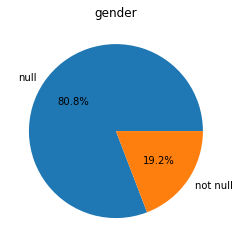

In [26]:
# 分类特征gender
labels=['null','not null']
y_data=[df['gender'].isnull().sum(),df['gender'].count()]
plt.pie(y_data,labels=labels,autopct='%1.1f%%')
plt.title("gender")
plt.show()

<AxesSubplot:title={'center':'price'}>

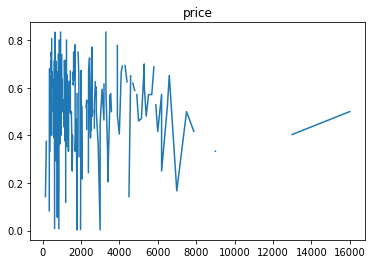

In [10]:
# 数值特征price
buy1=df.price[df.label == 1].value_counts()
unbuy1=df.price[df.label == 0].value_counts()
bb=buy1/(buy1+unbuy1)
bb.plot(kind='line',title='price')

<AxesSubplot:title={'center':'age'}>

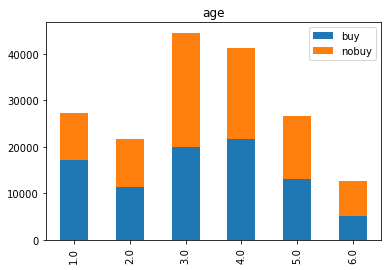

In [11]:
# 有序分类特征age
buy=df.age[df.label == 1].value_counts()
nobuy=df.age[df.label == 0].value_counts()
label_df=pd.DataFrame({'buy':buy,'nobuy':nobuy})
label_df.plot(kind='bar',stacked=True,title='age')

<AxesSubplot:title={'center':'city_level'}>

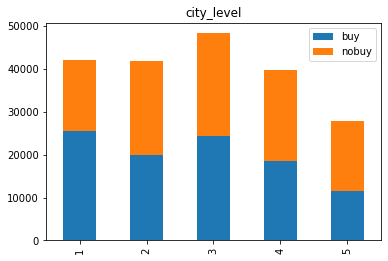

In [12]:
# 有序分类特征city_level
buy=df.city_level[df.label == 1].value_counts()
nobuy=df.city_level[df.label == 0].value_counts()
label_df=pd.DataFrame({'buy':buy,'nobuy':nobuy})
label_df.plot(kind='bar',stacked=True,title='city_level')


## 特征提取

In [ ]:
# 利用tags特征提取新特征tag_p

import numpy as np
import csv
import pandas as pd

df = pd.read_csv("D:\\train模型.csv", encoding='gbk')

# df.info()
df['tags'] = df['tags'].astype('object')
df['time'] = df['time'].astype('object')

for row in range(0, df.shape[0]):
    tag_list = df.iloc[row, 4].split("[")[1].split("]")[0].split(",")
    time_list = df.iloc[row, 5].split("[")[1].split("]")[0].split(",")
    if len(tag_list) >= 10:
        tag_time = []
        tag_new = []
        time_new = []
        # 二维数组用来筛选最近10个
        for i in range(len(tag_list)):
            tag_time.append([tag_list[i], time_list[i]])
        tag_time.sort(key=(lambda x: x[1]), reverse=True)  # 按照第二个元素（时间）排序
        # print(tag_time)
        for k in range(10):
            tag_new.append(tag_time[k][0])
            time_new.append(tag_time[k][1])  # 重新分装回列表
        # print(tag_new)
        df.at[row, 'tags'] = tag_new
        df.at[row, 'time'] = time_new  # 重新装回dataframe
print(df['tags'].head())

In [ ]:
import csv
total_tag = []
total_tag_unq = []

label_tag_list = []

for row in range(0, df.shape[0]):
    tag_new = []
    row_label = []  # 每行的label
    tags = df.iloc[row, 4]

    for i in range(len(tags)):
        # print(tags[i])
        label_tag_list.append([df.iloc[row, 1], tags[i]])  # 添加每一行的label+tag列表
        # print(label_tag_list[-1])
        total_tag.append(tags[i])  # tags列表
    # print(row)

total_tag_unq = list(set(total_tag))
print(len(total_tag_unq))

p_tag = []
c = 0
for each in total_tag_unq:
    one_count = 0
    count = 0
    for i in label_tag_list:
        if i[1]==each:
            one_count = one_count + int(i[0])
            count+=1
    p_one = one_count/count
    p_tag_temp = [each, one_count, count]
    with open('p.csv', 'a', newline='') as f:  # 将得到的tag概率存入p.csv中
        writer = csv.writer(f)
        writer.writerow(p_tag_temp)
    c+=1
    print(c)

In [ ]:
p = pd.read_csv('D:\\p.csv')
p.info()
p['ent'] = None
# p['tag_p'] = p['tag_p'].astype('object')
p_dic = dict(zip(p['tag'], p['p']))
tags = list(df['tags'])
# print(type(tags[1][0]))
ent_list = []
for row in range(0, df.shape[0]):
    print('用户：'+str(row+1))
    p_list = []
    for i in tags[row]:
        for key in p_dic.keys():
            if str(i)==str(key):
                p_list.append(p_dic[key])
                break
    ent = 0.0
    total = 0
    print(p_list)
    for p in p_list:
        total += float(p)
    if len(p_list)!=0:
        avg = total/len(p_list)
    else:
        avg = 0.5  # 若用户的tag在p.csv中无法找到，则将其设为0.5
    # print(total)
    # ent_list.append(ent)
    avg = [avg]
    with open('D:\\avg_train.csv', 'a', newline='') as f:
        writer = csv.writer(f)
        writer.writerow(avg)
    print('avg：'+str(avg))


## 数据分箱

[INFO] creating woe binning ...
{'price':   variable              bin  count  count_distr   good    bad   badprob  \
0    price    [-inf,1600.0)  89226     0.446130  42854  46372  0.519714   
1    price  [1600.0,2200.0)  22268     0.111340  12381   9887  0.444000   
2    price  [2200.0,2400.0)  12607     0.063035   6489   6118  0.485286   
3    price  [2400.0,2800.0)  24238     0.121190  11044  13194  0.544352   
4    price  [2800.0,3000.0)  18040     0.090200  10878   7162  0.397007   
5    price  [3000.0,3600.0)  17326     0.086630   7980   9346  0.539421   
6    price     [3600.0,inf)  16295     0.081475   8550   7745  0.475299   

        woe    bin_iv  total_iv  breaks  is_special_values  
0  0.082417  0.003029    0.0309  1600.0              False  
1 -0.221422  0.005436    0.0309  2200.0              False  
2 -0.055353  0.000193    0.0309  2400.0              False  
3  0.181395  0.003977    0.0309  2800.0              False  
4 -0.414433  0.015269    0.0309  3000.0             

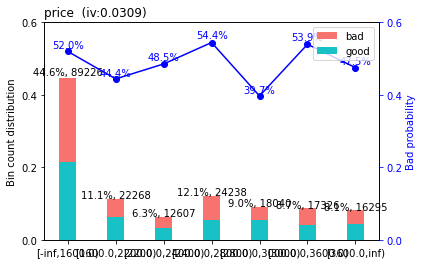

In [27]:
import scorecardpy as sc
price = pd.read_csv("D:\\train模型.csv", usecols=['price','label'])
bins = sc.woebin(price, y="label", method='tree')
sc.woebin_plot(bins)
print(bins)

## 缺失值填充

In [ ]:
import pandas as pd

# 使用RandomForestClassifier,填补缺失的年龄
from sklearn.ensemble import RandomForestRegressor
data_train = pd.read_csv("D:\\train模型.csv", encoding='gbk')

# 把已有的数据特征值取出，放入到Random Forest Regressor中
age_df = data_train[['age', 'price', 'tag_p' , 'label']]

# 把年龄做特征值转化，即根据上述放进来的特征值，把对应的转换为0、1两个数
age_df=pd.get_dummies(age_df)

# 分为已知年龄和未知年龄
known_age = age_df[age_df.age.notnull()].values
unknown_age = age_df[age_df.age.isnull()].values

# 目标年龄值
y = known_age[:, 0]
# 特征属性值
X = known_age[:, 1:]

# RandomForestRegressor训练
rfr = RandomForestRegressor(random_state=0, n_estimators=100, n_jobs=-1)
rfr.fit(X, y)

# 用得到的模型进行未知年龄结果预测
predictedAges = rfr.predict(unknown_age[:, 1::])

# 用得到的预测结果填补缺失数据
data_train.loc[(data_train.age.isnull()), 'age'] = predictedAges
data_train.to_csv('age_new.csv')
print(data_train['age'])

## 独热编码

In [73]:
data_city = pd.read_csv("D:\\train答辩.csv", usecols=['uid', 'city_level'],encoding='gbk')
city_onehot = pd.get_dummies(data_city['city_level'], prefix='city_level')
data_onehot = data_city.join(city_onehot)
df = df.join(data_onehot.drop(['uid', 'city_level'],axis=1))
df.head()

,uid,label,gender,age,tags,time,province,city,phone,model,price,price_level,city_level,tag_p,age_new,city_level_1,city_level_2,city_level_3,city_level_4,city_level_5
0,1190258,1,NaN,4.0,"[10147894,12164649,5737867,12614444,10567578,1...","[1.559305645165E12,1.589771859076E12,1.5593056...",�㶫,��β,OPPO,k1,1599,2,4,0.610324,4.00,0,0,0,1,0
1,1119469,0,NaN,NaN,"[12545416,13096510,12941454,10882324,13056107,...","[1.602720969208E12,1.602720969208E12,1.6027209...",����,��Դ,OPPO,r9s,2999,3,5,0.605882,3.81,0,0,0,0,1
2,1198468,1,NaN,4.0,"[9952871,10977296,12546375,12514349,9446069,10...","[1.583400582853E12,1.599880343178E12,1.5592561...",�ӱ�,�ȷ�,OPPO,r9,2499,3,2,0.559452,4.00,0,1,0,0,0
3,1134962,0,NaN,2.0,"[10308451,4457057,12164649,13669217,12874521,1...","[1.602050840433E12,1.559294082566E12,1.5743256...",����,����,OPPO,OPPO r11s,2999,3,3,0.434740,2.00,0,0,1,0,0
4,1202094,1,0.0,NaN,"[4457927,9334567,11219658,13647044,9460596,109...","[1.562217310326E12,1.569115329888E12,1.5622173...",����,����,��Ϊ,��â5,2499,3,2,0.556182,3.73,0,1,0,0,0


## 训练前处理

In [33]:
from sklearn.model_selection import train_test_split

In [38]:
df = pd.read_csv("D:\\train答辩.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   uid          200000 non-null  int64  
 1   label        200000 non-null  int64  
 2   gender       38350 non-null   float64
 3   age          174262 non-null  float64
 4   tags         200000 non-null  object 
 5   time         200000 non-null  object 
 6   province     200000 non-null  object 
 7   city         200000 non-null  object 
 8   phone        200000 non-null  object 
 9   model        200000 non-null  object 
 10  price        200000 non-null  int64  
 11  price_level  200000 non-null  int64  
 12  city_level   200000 non-null  int64  
 13  tag_p        200000 non-null  float64
 14  age_new      200000 non-null  float64
dtypes: float64(4), int64(5), object(6)
memory usage: 22.9+ MB


In [70]:
x = df[['tag_p','price']]
print(x.head())
y = df['label']
train_X, test_X, train_y, test_y = train_test_split(x, y, test_size=0.25)# 将原始数据集划分成训练集和测试集 8:2
print('数据集样本数：{}，训练集样本数：{}，测试集样本数：{}'.format(len(x), len(train_X), len(test_X)))

      tag_p  price
0  0.610324   1599
1  0.605882   2999
2  0.559452   2499
3  0.434740   2999
4  0.556182   2499
数据集样本数：200000，训练集样本数：150000，测试集样本数：50000


## 模型构建

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV 


In [40]:
# 逻辑回归模型
logreg = LogisticRegression()
logreg.fit(train_X, train_y)
train_score = logreg.score(test_X,test_y) 
train_score

0.72236

In [43]:
# 决策树
clf = GridSearchCV( 
    estimator=tree.DecisionTreeClassifier(criterion = 'entropy'),
    param_grid={ 
        'max_depth': [6, 7, 8, 9, 10], 
        }, 
    cv=5) # 五折交叉验证
clf.fit(train_X, train_y)  
train_socre = clf.score(test_X,test_y)
print(clf.best_score_) 
print(clf.best_params_)

0.7287666666666668
{'max_depth': 10}


In [44]:
# 随机森林
random_forest = GridSearchCV( 
    estimator=RandomForestClassifier(n_estimators=100, criterion = 'entropy',
                                     min_samples_leaf=20, min_samples_split=300),
    param_grid={ 
        'max_depth': [6, 7, 8, 9, 10, 11], 
        }, 
    cv=5) # 五折交叉验证
random_forest.fit(train_X, train_y)  
train_socre = random_forest.score(test_X,test_y)
print(clf.best_score_) 
print(clf.best_params_)

0.7287666666666668
{'max_depth': 10}


In [45]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

In [71]:
param = {
        'booster': 'gbtree',
        'objective': 'binary:logistic',
        'eval_metric': 'auc',
        'gamma': 0.01,
        'max_depth': 7,
        'alpha': 0,
        'lambda': 0,
        'subsample': 0.7,
        'colsample_bytree': 0.5,
        'min_child_weight': 3,
        'eta': 0.03,
        'nthread': -1,
        'missing': 1,
        'objective': 'multi:softmax',
        'num_class': 2
        }

In [72]:
xgb = XGBClassifier(**param)
xgb.fit(train_X, train_y)
train_score = xgb.score(test_X,test_y) 
print(train_score)

0.73742


In [ ]:
test_df = pd.read_csv("D:\\test.csv")
# x1 = test_df.drop(['uid','label','gender','age','tags','time','province','city','phone','model','city_level','price label','information_entropy_avg','new_ent','price','phone_onehot'],axis=1)
x1 = test_df[['tag_p','price']]
y_pred = rf.predict(x1)
y_pred.to_csv('predict.csv')